# **NEW**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from datetime import datetime,date


In [2]:
df = pd.read_csv("/content/SBIN_data.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/22/2020,317.000000,317.000000,313.700012,316.149994,308.444214,24994911
1,1/23/2020,316.000000,324.799988,314.149994,323.200012,315.322388,33293610
2,1/24/2020,323.500000,327.299988,321.149994,324.049988,316.151672,22706879
3,1/27/2020,320.899994,322.000000,315.799988,316.200012,308.493011,23309355
4,1/28/2020,317.950012,320.000000,311.049988,315.100006,307.419800,26488426


In [4]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,1/22/2020,317.000000,317.000000,313.700012,316.149994,308.444214,24994911
1,1,1/23/2020,316.000000,324.799988,314.149994,323.200012,315.322388,33293610
2,2,1/24/2020,323.500000,327.299988,321.149994,324.049988,316.151672,22706879
3,3,1/27/2020,320.899994,322.000000,315.799988,316.200012,308.493011,23309355
4,4,1/28/2020,317.950012,320.000000,311.049988,315.100006,307.419800,26488426


In [5]:
df =df.drop(['Date','Adj Close'], axis = 1)
df.head()

,index,Open,High,Low,Close,Volume
0,0,317.000000,317.000000,313.700012,316.149994,24994911
1,1,316.000000,324.799988,314.149994,323.200012,33293610
2,2,323.500000,327.299988,321.149994,324.049988,22706879
3,3,320.899994,322.000000,315.799988,316.200012,23309355
4,4,317.950012,320.000000,311.049988,315.100006,26488426


In [6]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing)

(333, 1)
          Close
333  425.200012
334  422.049988
335  424.350006
336  432.549988
337  437.250000
..          ...
471  484.799988
472  481.149994
473  467.799988
474  449.200012
475  446.000000

[143 rows x 1 columns]


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [8]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.6253073 ],
       [0.65197655],
       [0.6551919 ],
       [0.62549651],
       [0.62133534],
       [0.62644223],
       [0.60469076],
       [0.63400795],
       [0.55702666],
       [0.58785697],
       [0.60582557],
       [0.64724797],
       [0.64195187],
       [0.63419705],
       [0.65632682],
       [0.64062796],
       [0.66805372],
       [0.6376016 ],
       [0.61793078],
       [0.63060328],
       [0.64119537],
       [0.66881023],
       [0.65103084],
       [0.66559477],
       [0.67089087],
       [0.64724797],
       [0.57556267],
       [0.51654997],
       [0.52581803],
       [0.50860594],
       [0.52071114],
       [0.4526196 ],
       [0.38812177],
       [0.35653489],
       [0.23359182],
       [0.34480799],
       [0.27425761],
       [0.24323808],
       [0.24342723],
       [0.19973515],
       [0.22318895],
       [0.11632305],
       [0.1223756 ],
       [0.14772078],
       [0.15850196],
       [0.17060711],
       [0.13637219],
       [0.174

In [9]:
data_training_array.shape

(333, 1)

In [10]:
x_train = []
y_train = []
for i in range(100,data_training.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train.shape

(233, 100, 1)

In [12]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [13]:
#1
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
#2
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3))
#3
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True, ))
model.add(Dropout(0.4))
#4
model.add(LSTM(units = 120, activation = 'relu' ))
model.add(Dropout(0.5))

#dense layer
model.add(Dense(units = 1))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [15]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train , y_train, epochs = 5)

Epoch 1/5
8/8 [==============================] - 9s 496ms/step - loss: 0.2676
Epoch 2/5
8/8 [==============================] - 4s 479ms/step - loss: 0.1223
Epoch 3/5
8/8 [==============================] - 2s 256ms/step - loss: 0.0672
Epoch 4/5
8/8 [==============================] - 2s 258ms/step - loss: 0.0562
Epoch 5/5
8/8 [==============================] - 2s 255ms/step - loss: 0.0409


In [16]:
past_100_days = data_training.tail(100)

In [17]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-17-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [18]:
final_df.head()

,Close
0,277.899994
1,276.899994
2,274.950012
3,279.399994
4,281.049988


In [19]:
input_data = scaler.fit_transform(final_df)


In [20]:
input_data.shape

(243, 1)

In [21]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [22]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(143, 100, 1)
(143,)


In [23]:
#making prediction

y_predicted= model.predict(x_test)

5/5 [==============================] - 1s 71ms/step


In [24]:
y_predicted.shape

(143, 1)

In [25]:
y_predicted

array([[0.36523464],
       [0.36931205],
       [0.3738976 ],
       [0.3789568 ],
       [0.38445705],
       [0.39036575],
       [0.39664418],
       [0.40322316],
       [0.41001636],
       [0.41691923],
       [0.42380524],
       [0.43058804],
       [0.4371941 ],
       [0.44356692],
       [0.44966117],
       [0.45543244],
       [0.4608283 ],
       [0.4657836 ],
       [0.47026643],
       [0.47426286],
       [0.4777763 ],
       [0.4808186 ],
       [0.483446  ],
       [0.48572016],
       [0.48768556],
       [0.48937157],
       [0.4908056 ],
       [0.49202523],
       [0.49309167],
       [0.49405718],
       [0.4949731 ],
       [0.49585575],
       [0.4967053 ],
       [0.4975257 ],
       [0.49832505],
       [0.49911645],
       [0.49991342],
       [0.50072104],
       [0.5015336 ],
       [0.5023187 ],
       [0.5030448 ],
       [0.5037068 ],
       [0.5042919 ],
       [0.5048102 ],
       [0.5052645 ],
       [0.50570416],
       [0.50615436],
       [0.506

In [26]:
scaler.scale_

array([0.00391389])

In [27]:
scale_factor = 1/0.00988704
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

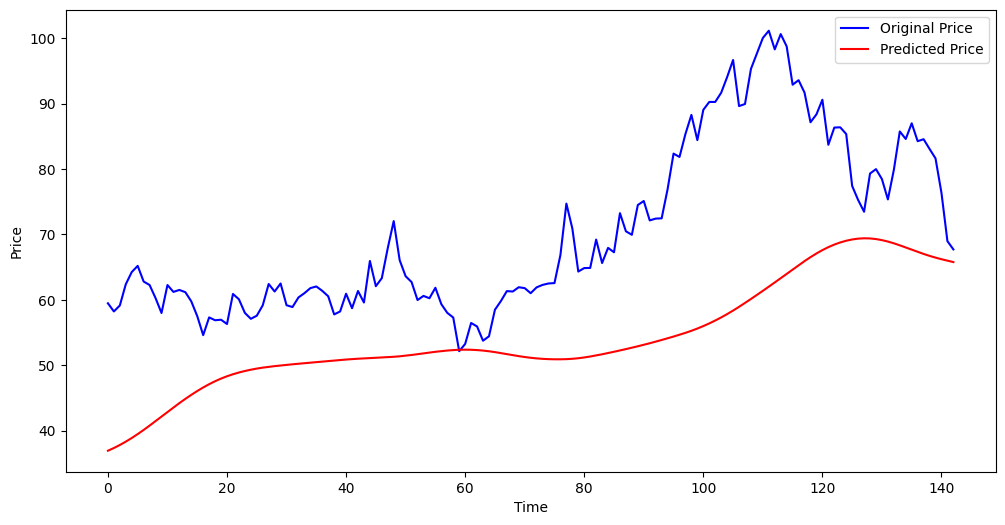

In [28]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show